<div style="display: flex; align-items: center; justify-content: space-between;">
  <img src="Images/mario.webp" alt="Left Image" style="width: 100px; height: auto;">
  <h2>Analysis of videogame sales from 1980-2016</h2>
  <img src="Images/Sonic.webp" alt="Right Image" style="width: 100px; height: auto;">
</div>

The videogame industry has shifted immensely from its humble origins as a niche market to having a global market revenue of almost [$220 billion in 2022](https://www.grandviewresearch.com/industry-analysis/video-game-market#:~:text=Report%20Overview,13.4%25%20from%202023%20to%202030.), this analysis aims to look at sales data between 1980 and 2016 and gather any insights into the evolution of the market over nearly 40 years.

![](Images/GamesRev.png)

data sourced from https://www.kaggle.com/datasets/gregorut/videogamesales

### Loading and cleaning data

Firstly, importing the libraries that will be used to load, clean and visualise our data.

In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading our data into a DataFrame and printing some of the data so we can get a better understanding of its formatting.


In [136]:
gamesDF = pd.read_csv('vgsales.csv')
gamesDF
sns.set_theme()

To ensure data quality we will remove any duplicate data and then check how much of our data contains NaN values so we can decide how we want to continue with cleaning 

In [137]:
gamesDF = gamesDF.drop_duplicates()
display(gamesDF)
nullDF = gamesDF[gamesDF.isnull().any(axis=1)]
nullDF

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


In [138]:
gamesDF.loc[gamesDF['Publisher'] == 'Unknown']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
940,942,Gran Turismo Concept 2001 Tokyo,PS2,2001.0,Racing,Unknown,0.00,1.10,0.42,0.33,1.84
1649,1651,NASCAR Thunder 2003,PS2,NaN,Racing,Unknown,0.60,0.46,0.00,0.16,1.22
2114,2116,Suikoden III,PS2,NaN,Role-Playing,Unknown,0.29,0.23,0.38,0.08,0.98
2173,2175,Wheel of Fortune,PS2,NaN,Misc,Unknown,0.47,0.36,0.00,0.12,0.95
2236,2238,Teenage Mutant Ninja Turtles,GBA,2003.0,Action,Unknown,0.67,0.25,0.00,0.02,0.93
...,...,...,...,...,...,...,...,...,...,...,...
16460,16463,"Horse Life 4: My Horse, My Friend, My Champion",3DS,2015.0,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16532,16535,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01
16545,16548,The Treasures of Mystery Island 3 Pack - Save ...,PC,2011.0,Puzzle,Unknown,0.01,0.00,0.00,0.00,0.01


We found that the data contained no duplicates by comparing the DataFrame size pre and post-dropping duplicates, 307 of our rows also contain NaN values as well as 203 having 'Unknown' as their publisher. Due to being a low proportion of our data set dropping these rows is unlikely to skew our analysis and will make later manipulation of the DataFrame easier. We also have incomplete data for any year past 2015 limiting the insight we can gain from those data points so we will drop any data past 2015.

In [139]:
gamesDF = gamesDF.drop(gamesDF[gamesDF['Publisher'] == 'Unknown'].index)
gamesDF

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [140]:
gamesDF = gamesDF.dropna()
gamesDF

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [141]:
gamesDF.reset_index(inplace=True,drop=True)
gamesDF

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16186,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16187,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16188,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16189,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [142]:
gamesDF = gamesDF.drop(gamesDF[gamesDF['Year'] > 2015].index)
gamesDF

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16186,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16187,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16188,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16189,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Now our Year column doesn't contain any non-number values we can convert it from a Float to an Int which will help our data visualisations look a little cleaner

In [143]:
gamesDF['Year'] = gamesDF['Year'].astype(int)
gamesDF

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16186,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16187,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16188,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16189,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Our data also splits games by platform released on, if we ever want to use a games total sales across platforms we will have to remember this and group our data by Name.

In [144]:
gamesDF[gamesDF['Name']== 'Call of Duty: Black Ops']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
31,32,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
40,41,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
1365,1381,Call of Duty: Black Ops,Wii,2010,Shooter,Activision,0.82,0.47,0.00,0.12,1.40
3157,3213,Call of Duty: Black Ops,DS,2010,Shooter,Activision,0.54,0.05,0.00,0.04,0.63


### Visualising Data

Now our data is prepared, we can move on to Visualising and then analysing our data. To begin with, using stack plots to show both global sales by region over time and share of global sales by region over time will allow us to pick key years where large changes in global sales or the ratio of sales between regions occur for further analysis.

In [145]:
# filteredByYear = gamesDF[(gamesDF['Year'] >= 1980) & (gamesDF['Year'] <= 2024)]
salesByYear = gamesDF.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
salesByYear

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1980,10.59,0.67,0.00,0.12
1,1981,33.13,1.94,0.00,0.32
2,1982,26.92,1.65,0.00,0.31
3,1983,7.76,0.80,8.10,0.14
4,1984,33.28,2.10,14.27,0.70
5,1985,33.73,4.74,14.56,0.92
6,1986,12.50,2.84,19.81,1.93
7,1987,8.46,1.41,11.63,0.20
8,1988,23.87,6.59,15.76,0.99
9,1989,45.15,8.44,18.36,1.50


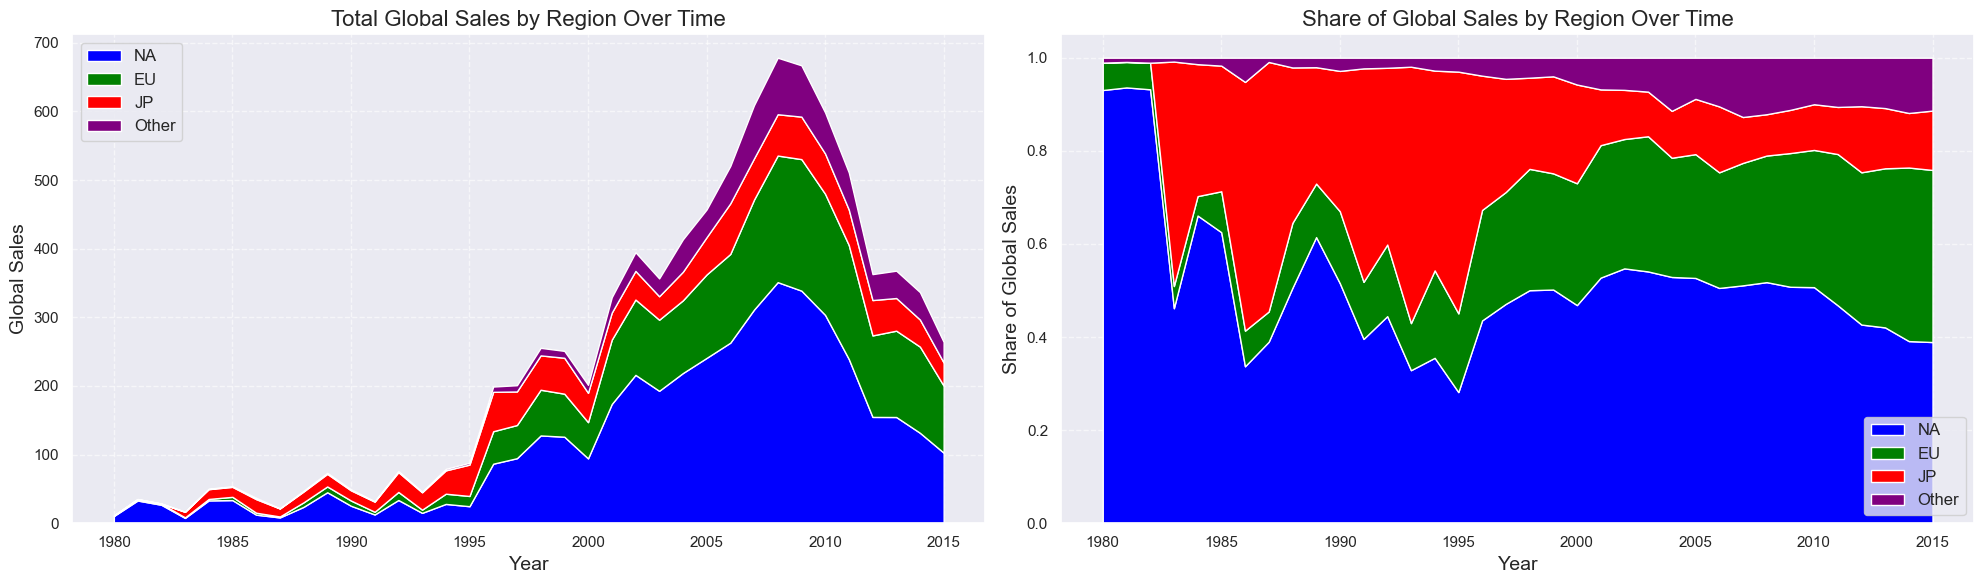

In [146]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
# Graph 1
ax1.stackplot(salesByYear.Year,salesByYear.NA_Sales,salesByYear.EU_Sales,salesByYear.JP_Sales,salesByYear.Other_Sales,labels=['NA', 'EU', 'JP', 'Other'], colors=['blue', 'green', 'red', 'purple'])
ax1.set_title('Total Global Sales by Region Over Time',fontsize = 16)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Global Sales (Millions)', fontsize=14)
ax1.legend(loc='upper left', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)

# Graph 2
salesByYear['TotalSales'] = salesByYear[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)
salesByYear['NA_Share'] = salesByYear['NA_Sales'] / salesByYear['TotalSales']
salesByYear['EU_Share'] = salesByYear['EU_Sales'] / salesByYear['TotalSales']
salesByYear['JP_Share'] = salesByYear['JP_Sales'] / salesByYear['TotalSales']
salesByYear['Other_Share'] = salesByYear['Other_Sales'] / salesByYear['TotalSales']
ax2.stackplot(salesByYear['Year'], 
              salesByYear['NA_Share'], 
              salesByYear['EU_Share'], 
              salesByYear['JP_Share'], 
              salesByYear['Other_Share'],
              labels=['NA', 'EU', 'JP', 'Other'],
              colors=['blue', 'green', 'red', 'purple'])

ax2.set_title('Share of Global Sales by Region Over Time', fontsize=16)
ax2.set_xlabel('Year', fontsize=14)
ax2.set_ylabel('Share of Global Sales', fontsize=14)
ax2.legend(loc='lower right', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()


From analysing both of these graphs we can some key dates:

1996 shows both a large increase in global sales but also an increase in the American and European share of sales, this could be attributed to the release of the Sony PlayStation and Nintendo 64 consoles and their performing well in both markets, [PlayStation especially would go on to sell over 100 million units over its lifetime](https://web.archive.org/web/20110524023857/http://www.scei.co.jp/corporate/data/bizdataps_e.html). The success of the PlayStation cemented consoles move from distributing games on cartridges to CD-ROMS as most consoles developed after would use some disk format for their games. 

In the year 2001, we see a similar increase in both total sales and NA and EU share of sales, this again coincides with the release of the Sony PlayStation 2 as well as a rerelease of the original PlayStation along with its main competitor the Xbox. The PlayStation 2 would go on to be the current best-selling console of all time, its ability to play DVDs would also be a feature that most consoles after its release would emulate.

2008 is the peak of global sales for our data and a sharp drop in sales occurred after 2010, after analysing the data source for our data we found that while not mentioned our data tracks the physical sales of games. This coincides with a huge increase in the adoption of digital games marketplaces such as Steam or consoles adopting their own digital marketplaces, facilitated by a widespread adoption of household broadband. [By 2022 90% of game sales would be digital](https://www.gamebyte.com/90-of-video-game-sales-in-2022-were-digital/#:~:text=90%25%20of%20video%20game%20sales%20in%202022%20were%20digital) with many dedicated physical game stores defunct.




![](Images/broadband.png)

### Publishers
Visualising our data to show the top-performing publishers by time period will allow us to analyse how previously discussed changes in regions' market share affected the companies that make and sell these games.



<Figure size 640x480 with 0 Axes>

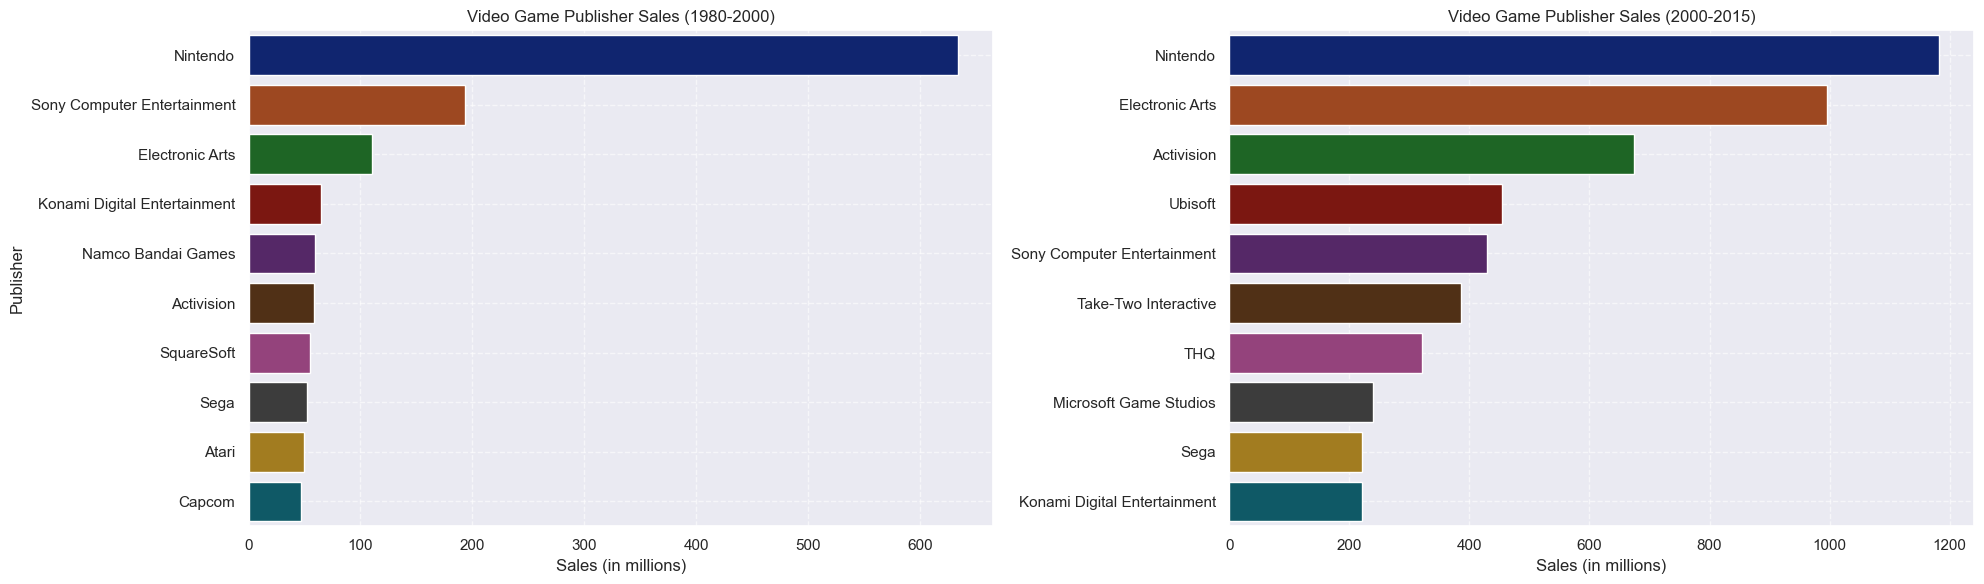

In [147]:
pre2000DF = gamesDF[(gamesDF['Year'] >= 1980) & (gamesDF['Year'] <= 2000)]
pubPre2000 = pre2000DF.groupby('Publisher')['Global_Sales'].sum()
pubPre2000 = pd.DataFrame(pubPre2000.sort_values(ascending=False).head(10))


post2000DF = gamesDF[(gamesDF['Year'] >= 2000) & (gamesDF['Year'] <= 2015)]
pubPost2000 = post2000DF.groupby('Publisher')['Global_Sales'].sum()
pubPost2000 = pd.DataFrame(pubPost2000.sort_values(ascending=False).head(10))


plt.subplots_adjust(wspace=.4)
plt.figure(figsize=(20, 6))
# graph 1
plt.subplot(1, 2, 1)
sns.barplot(x='Global_Sales', y='Publisher', data=pubPre2000, palette='dark',hue ='Publisher')
plt.title('Video Game Publisher Sales (1980-2000)')
plt.xlabel('Sales (in millions)')
plt.ylabel('Publisher')
plt.grid(True, linestyle='--', alpha=0.6)

# graph 2
plt.subplot(1, 2, 2)
sns.barplot(x='Global_Sales', y='Publisher', data=pubPost2000, palette='dark', hue ='Publisher')
plt.title('Video Game Publisher Sales (2000-2015)')
plt.xlabel('Sales (in millions)')
plt.ylabel('')
plt.grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()

From our graphs we can see a clear dominance in Japanese publishers pre-2000 having 7/10 of the top publishers as well as a huge dominance by Nintendo but post-2000 we see the majority of publishers are now American companies. 

Combining our insights from these and our previous visualisations we can infer that once non-Japanese markets saw a huge jump in market share post-2000 many American publishers, either newly established or pre-existing, took the opportunity to fill the new demands of this large English-speaking audience. Sufficient time had also allowed for expertise in developing games from Japanese companies to transfer out to the rest of the world. 


### Game Genres
Finally, we will analyse the shifting trends in the most popular game genres over time in different regions and see if we can link that to our previous data.


Text(0.5, 1.0, 'American Sales by Genre Over Time')

<Figure size 640x480 with 0 Axes>

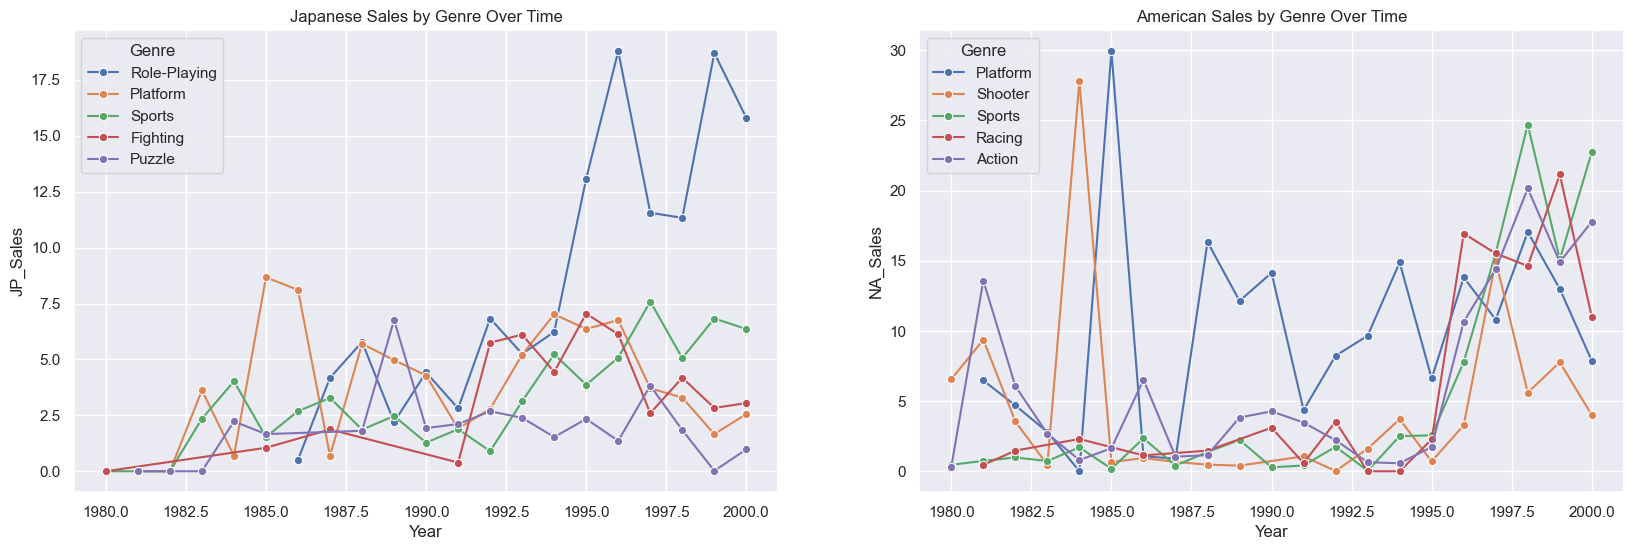

In [148]:
genreGroupJP = pre2000DF.groupby(['Genre'])['JP_Sales'].sum()
topGenresJP = genreGroupJP.sort_values(ascending=False).head(5)
filteredDFJP = pre2000DF[pre2000DF['Genre'].isin(topGenresJP.index)]

genreGroupNA = pre2000DF.groupby(['Genre'])['NA_Sales'].sum()
topGenresNA = genreGroupNA.sort_values(ascending=False).head(5)
filteredDFNA = pre2000DF[pre2000DF['Genre'].isin(topGenresNA.index)]

genreGroupJP = filteredDFJP.groupby(['Genre','Year'])['JP_Sales'].sum()
genreDFJP = pd.DataFrame(genreGroupJP.sort_values(ascending=False))

genreGroupNA = filteredDFNA.groupby(['Genre','Year'])['NA_Sales'].sum()
genreDFNA = pd.DataFrame(genreGroupNA.sort_values(ascending=False))

plt.subplots_adjust(wspace=.4)
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='JP_Sales', hue='Genre', data=genreDFJP, marker='o')
plt.title('Japanese Sales by Genre Over Time')

plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='NA_Sales', hue='Genre', data=genreDFNA, marker='o')
plt.title('American Sales by Genre Over Time')

From our graphs we can see some similar genres but Japanese audiences favoured the Role-Playing genre highly during the 90's compared to American audiences who had a more even spread on genre game sales over time. We will now visualise the breakdown by genre for the world post-2000 so we can see if any market trends from both these regions carry forward.

C:\Users\liamd\AppData\Local\Temp\ipykernel_25320\1538299487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post2000DF['TotalSales'] = post2000DF[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)


Text(0.5, 1.0, 'Top 5 Genres Post 2000 by Worldwide Sales')

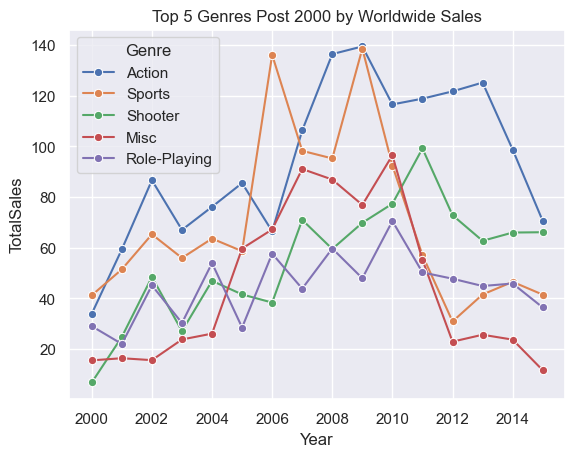

In [149]:
post2000DF['TotalSales'] = post2000DF[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)

genreGroupALL = post2000DF.groupby(['Genre'])['TotalSales'].sum()
topGenresALL = genreGroupALL.sort_values(ascending=False).head(5)
filteredDFALL = post2000DF[post2000DF['Genre'].isin(topGenresALL.index)]

genreGroupALL = filteredDFALL.groupby(['Genre','Year'])['TotalSales'].sum()
genreDFALL = pd.DataFrame(genreGroupALL.sort_values(ascending=False))


sns.lineplot(x='Year', y='TotalSales', hue='Genre', data=genreDFALL, marker='o')
plt.title('Top 5 Genres Post 2000 by Worldwide Sales')

From this graph and using our previous analysis, we can see that trends seem to fit more closely to American tastes shown in our pre-2000 graph. This is to be expected as the bulk of the increase in game sales from post-2000 came from American and European markets. However, we do see Role-Playing games now suggesting a shift in taste for English-speaking markets due to being influenced by games aimed at Japanese markets.

## Conclusion
To summarise our analysis, our data shows a clear dominance both in production and demand for games from Japanese markets pre-2000. Then due to the successful launches of initially Japanese consoles in worldwide markets demand grew for games aimed at Western audiences, this was mostly filled by games published by American companies. Due to European and American markets taking up the bulk of game sales results in successful genres post 2000 following more closely with American trends but some influence from early Japanese dominance can be seen with the introduction of Role-Playing games in the top 5 highest selling genres.

### Limitations
As discovered during our analysis, our data only contains physical sales making any analysis of post-2008 less and less useful as digital sales take up an increasing percentage of sales every year. This limits our ability to do predictive analysis or analysis of more recent trends. Discounting digital sales also reduces our ability to analyse other markets, for example, Chinese game companies such as Tencent have found huge success recently having a [yearly revenue of almost $90 billion in 2023](https://www.macrotrends.net/stocks/charts/TCEHY/tencent-holding/revenue#:~:text=Tencent%20Holding%20revenue%20for%20the,a%205.08%25%20decline%20from%202021.) but due to entering the market after it had almost fully digitised we have no data on them. This same problem also means our dataset lacks some of the highest performing games due to them being largely sold digitally, Minecraft for example, having [sold 72 million copies by 2015](https://www.businessofapps.com/data/minecraft-statistics/) so within our dataset’s bounds. 

